# DATA ANALYSIS PHASE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [2]:
dataset=pd.read_csv('heart.csv')

print(dataset.shape)

(303, 14)


In [3]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Missing values

In [5]:
dataset.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no missing values

We have all numerical values

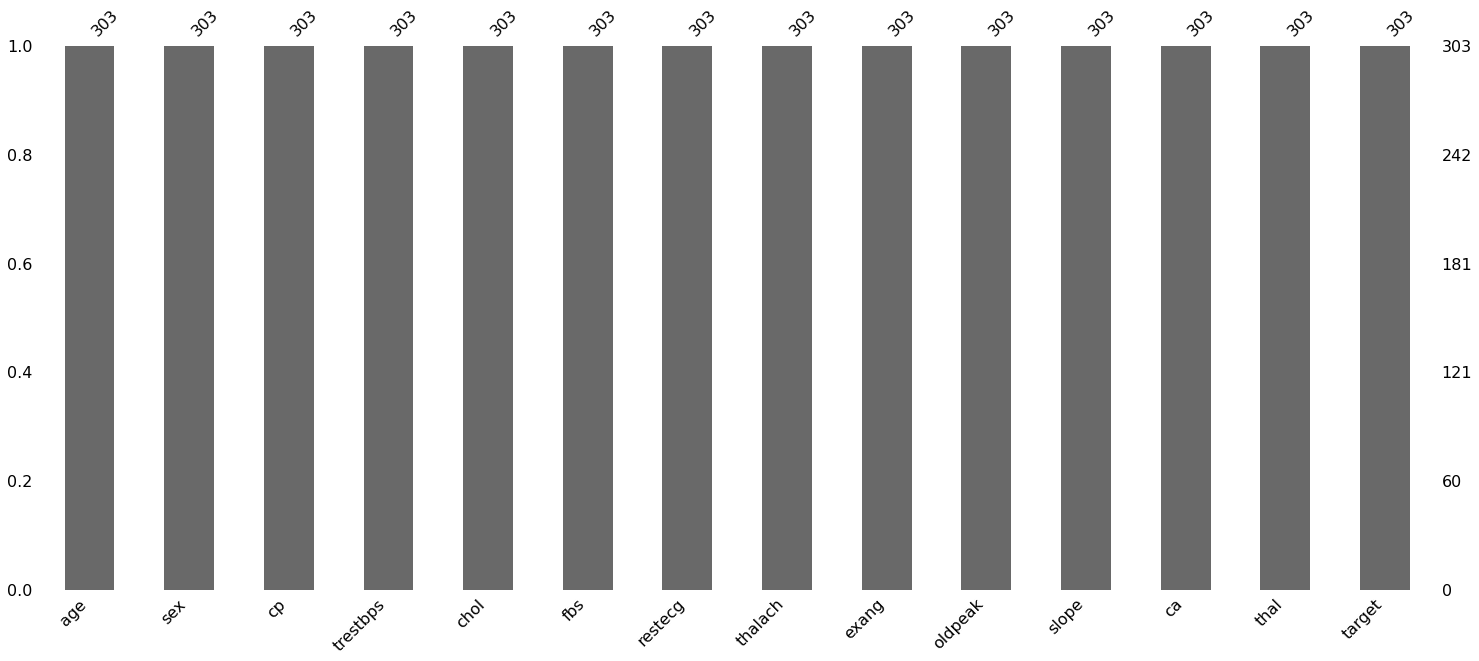

In [6]:
import missingno as mns
mns.bar(dataset)
plt.show()

### Correlation Matrix

<AxesSubplot:>

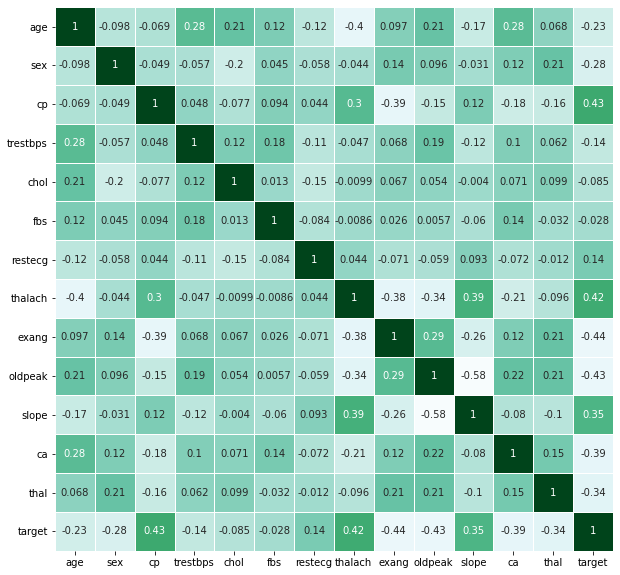

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dataset.corr(),cbar=False,cmap='BuGn',annot=True,linewidths=.5, ax=ax)

### Data Analysis

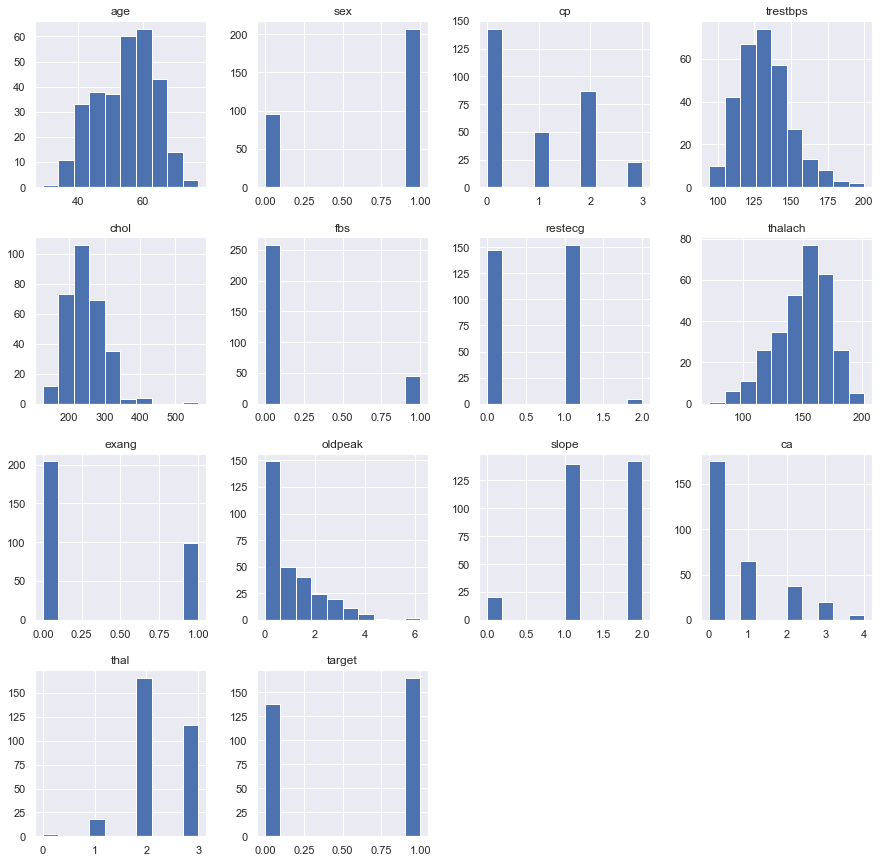

In [8]:
sns.set()
p = dataset.hist(figsize = (15,15))

<AxesSubplot:xlabel='target', ylabel='age'>

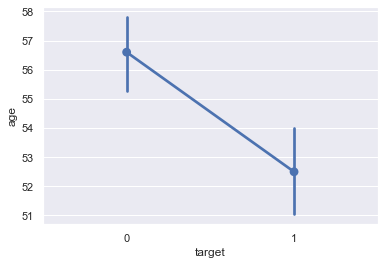

In [9]:
sns.set()
sns.pointplot(x='target', y='age', data=dataset)

<AxesSubplot:xlabel='age', ylabel='target'>

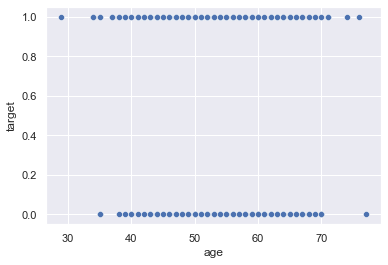

In [10]:
sns.scatterplot(x='age', y='target', data=dataset)


<AxesSubplot:xlabel='target', ylabel='count'>

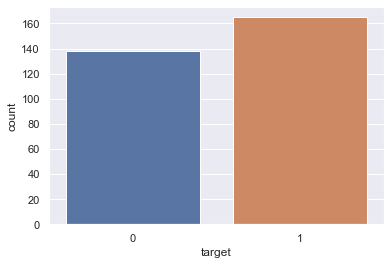

In [11]:
sns.countplot(x='target', data=dataset)


<AxesSubplot:xlabel='target', ylabel='trestbps'>

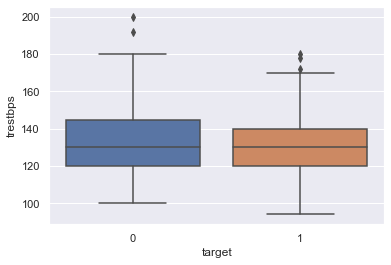

In [12]:
sns.boxplot(x='target', y ='trestbps', data=dataset)

<AxesSubplot:xlabel='age', ylabel='thalach'>

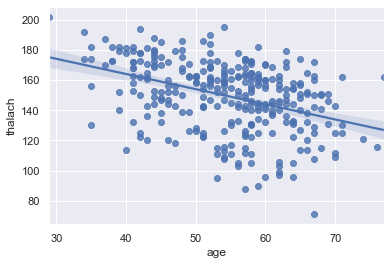

In [13]:
sns.regplot(x='age', y='thalach', data=dataset)


<AxesSubplot:xlabel='age', ylabel='thalach'>

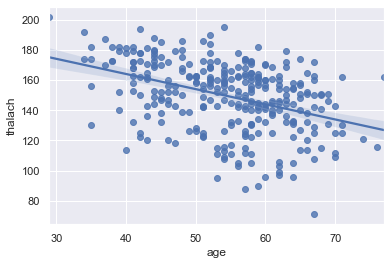

In [14]:
sns.regplot(x='age', y='thalach', data=dataset)


In [15]:
dataset.var()

age           82.484558
sex            0.217166
cp             1.065132
trestbps     307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalach      524.646406
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             1.045724
thal           0.374883
target         0.248836
dtype: float64

In [34]:
import plotly.express as px
ax=px.pie(dataset, names= "target" ,template= "plotly_dark",title="target",hole=0.8)
ax.show()


## Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#x = pd.DataFrame(sc.fit_transform(df.drop(["target"],axis = 1),),
        #columns=['age', 'sex', 'cp', 'trestbps', 'chol',
       #'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'])
x = sc.fit_transform(dataset.drop(['target'], axis=1))
x=pd.DataFrame(x)

In [18]:
y = dataset['target']

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Models

In [20]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import Dropout
model = tf.keras.Sequential([
    layers.Dense(20, activation='relu',name='layer1'),
    Dropout(0.2),
    layers.Dense(25, activation='relu', name='layer2'),
    Dropout(0.5),
    layers.Dense(10, activation='relu', name='layer3'),
    layers.Dense(1, activation='sigmoid', name='f-layer'),
])

In [21]:
from tensorflow import keras 
from keras.optimizers import SGD
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(
      loss = 'binary_crossentropy',#keras.losses.SparseCategoricalCrossentropy(from_logits = True),
      optimizer = opt,
      metrics = ['accuracy'],
)

In [22]:
model.fit(x_train, y_train, batch_size = 32, epochs = 100, verbose=1)

Epoch 1/100
8/8 [==============================] - 2s 2ms/step - loss: 0.8334 - accuracy: 0.5620
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7150 - accuracy: 0.5661
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6749 - accuracy: 0.5785
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6379 - accuracy: 0.6612
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6075 - accuracy: 0.6983
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5881 - accuracy: 0.6942
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5463 - accuracy: 0.7479
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5608 - accuracy: 0.6983
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5492 - accuracy: 0.7190
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4996 - accuracy: 0.7521
Epoch 11/100
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.2685 - accuracy: 0.9008
Epoch 85/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3218 - accuracy: 0.8802
Epoch 86/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2687 - accuracy: 0.8926
Epoch 87/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2858 - accuracy: 0.8678
Epoch 88/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3297 - accuracy: 0.8471
Epoch 89/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2597 - accuracy: 0.8884
Epoch 90/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2532 - accuracy: 0.9132
Epoch 91/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3004 - accuracy: 0.8678
Epoch 92/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2749 - accuracy: 0.8967
Epoch 93/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2620 - accuracy: 0.9008
Epoch 94/100
8/8 [===============

In [23]:
model.evaluate(x_test, y_test, batch_size=32, verbose=1)

2/2 [==============================] - 0s 0s/step - loss: 0.3521 - accuracy: 0.8852


[0.352064311504364, 0.8852459192276001]

In [24]:
y_pred = model.predict(x_test)
y_pred=y_pred.round()


In [27]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression().fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred=y_pred.round()
print("Train score:",model.score(x_train,y_train))
print("Test score:",model.score(x_test,y_test))

Train score: 0.8429752066115702
Test score: 0.8524590163934426


In [28]:
from sklearn.linear_model import SGDClassifier
model=SGDClassifier(loss='squared_hinge',shuffle=True,random_state=0,learning_rate='invscaling',eta0=0.4,alpha=0.1)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred=y_pred.round()
print("Train score:",model.score(x_train,y_train))
print("Test score:",model.score(x_test,y_test))

Train score: 0.8429752066115702
Test score: 0.8360655737704918


In [29]:
from sklearn.neighbors import KNeighborsClassifier
for k in range(1,11):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred=y_pred.round()
    print("k: {}  Train score:{} Test Score:{}".format(k,model.score(x_train,y_train),model.score(x_test,y_test)))

k: 1  Train score:1.0 Test Score:0.819672131147541
k: 2  Train score:0.871900826446281 Test Score:0.819672131147541
k: 3  Train score:0.8636363636363636 Test Score:0.8360655737704918
k: 4  Train score:0.8760330578512396 Test Score:0.8524590163934426
k: 5  Train score:0.8677685950413223 Test Score:0.819672131147541
k: 6  Train score:0.8471074380165289 Test Score:0.8524590163934426
k: 7  Train score:0.8553719008264463 Test Score:0.8360655737704918
k: 8  Train score:0.8512396694214877 Test Score:0.8852459016393442
k: 9  Train score:0.8553719008264463 Test Score:0.8524590163934426
k: 10  Train score:0.8512396694214877 Test Score:0.8852459016393442


Optimal number of neighbors is 4

In [30]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=4)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred=y_pred.round()
print("k: {}  Train score:{} Test Score:{}".format(4,model.score(x_train,y_train),model.score(x_test,y_test)))

k: 4  Train score:0.8760330578512396 Test Score:0.8524590163934426


In [32]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=10,random_state=0,min_samples_leaf=15).fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred=y_pred.round()
print("Train score:",model.score(x_train,y_train))
print("Test score:",model.score(x_test,y_test))

Train score: 0.8429752066115702
Test score: 0.819672131147541


## Conclusion
We get the best accuracy from our Neural Network.
Hence, we will use this model to make our prediction

In [46]:

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import Dropout
model = tf.keras.Sequential([
    layers.Dense(20, activation='relu',name='layer1'),
    Dropout(0.2),
    layers.Dense(25, activation='relu', name='layer2'),
    Dropout(0.5),
    layers.Dense(10, activation='relu', name='layer3'),
    layers.Dense(1, activation='sigmoid', name='f-layer'),
])

In [47]:
from tensorflow import keras 
from keras.optimizers import SGD
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(
      loss = 'binary_crossentropy',#keras.losses.SparseCategoricalCrossentropy(from_logits = True),
      optimizer = opt,
      metrics = ['accuracy'],
)

In [48]:
model.fit(x_train, y_train, batch_size = 32, epochs = 100, verbose=1)

Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 0.7142 - accuracy: 0.5083
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5744
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6718 - accuracy: 0.5661
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6663 - accuracy: 0.6198
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6549 - accuracy: 0.6322
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6515 - accuracy: 0.6240
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6325 - accuracy: 0.6736
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6097 - accuracy: 0.7231
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5878 - accuracy: 0.7107
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5769 - accuracy: 0.7603
Epoch 11/100
8/8 [===========

8/8 [==============================] - 0s 2ms/step - loss: 0.2423 - accuracy: 0.9008
Epoch 85/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2731 - accuracy: 0.8967
Epoch 86/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2675 - accuracy: 0.8967
Epoch 87/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2863 - accuracy: 0.8760
Epoch 88/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2726 - accuracy: 0.8843
Epoch 89/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2448 - accuracy: 0.8884
Epoch 90/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2466 - accuracy: 0.9132
Epoch 91/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2574 - accuracy: 0.9091
Epoch 92/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2884 - accuracy: 0.8760
Epoch 93/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2897 - accuracy: 0.8843
Epoch 94/100
8/8 [===============

In [49]:
model.evaluate(x_test, y_test, batch_size=32, verbose=1)

2/2 [==============================] - 0s 17ms/step - loss: 0.3793 - accuracy: 0.9180


[0.3793315589427948, 0.9180327653884888]

In [50]:
x_given=[[25,0,1,110,162,0,0,150,1,0.8,0,1,1]]

In [51]:
final_pred=model.predict(x_given)
print(int(final_pred.round()))

1


We get prediction of 1, i.e, the given patient will have heart disease